<a href="https://colab.research.google.com/github/hflautert/AnomalyDetection/blob/main/ModeloHMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de histórico de médias móveis para reconhecimento de anomalias.

O modelo possui 3 variáveis para configuração do reconhecimento de anomalia.

*   Taxa de crescimento sucessivo entre as últimas 3 médias móveis.
*   Intervalo para formação da média móvel.
*   Taxa mínima para considerar variação das médias móveis.

In [ ]:
# Importando bibliotecas
# Manipulação de matrizes e operações matemáticas de alto nível
import numpy as np
# Geração de gráficos

import matplotlib.pyplot as plt

Primeiramente visualizamos o crescimento hipotético com diferentes porcentagens. Assim é possível perceber as possibilidades de configuração da taxa de crescimento entre médias móveis.

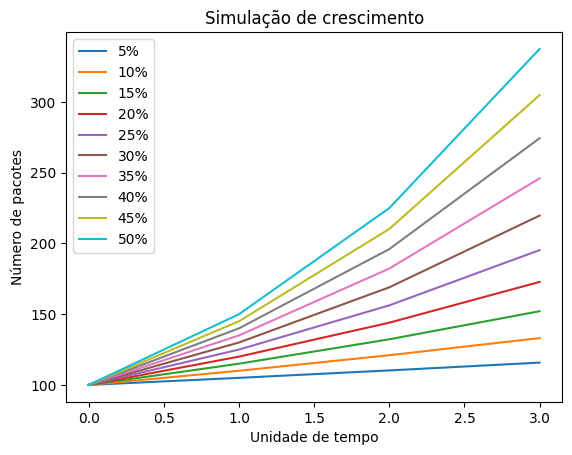

In [ ]:
# Construindo crescimento percentual
percentual=[1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5]
unidades=4
exemplo=np.ones((unidades,len(percentual)))
coluna=0
for i in percentual:
  valor=100
  #print('\nCrescimento de:',i)
  for n in range(0, unidades):
    #print(valor)
    exemplo[n][coluna]=valor
    valor=valor*i
  coluna=coluna+1

# Exibindo gráfico
for i in range(0,len(percentual)):
  legenda=format((percentual[i]-1), ".0%")
  plt.plot(exemplo[:,i], label = legenda)
plt.title('Simulação de crescimento')
plt.xlabel('Unidade de tempo')
plt.ylabel('Número de pacotes')
plt.legend(loc='best')
plt.show()

Aqui é exibido a detectçao de um ataque, com enfase no primeira variável do modelo, o crescimento sucessivo das últimas 3 médias móveis.

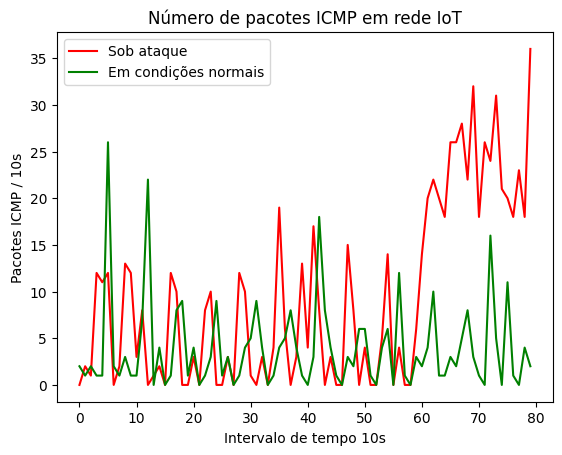

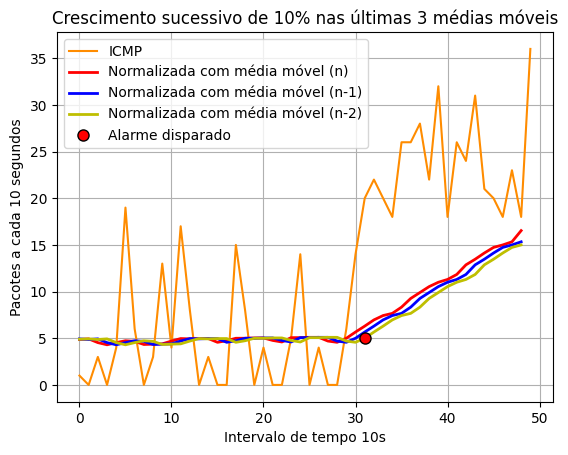

In [ ]:
# Carregamento dos dados
dados_normal_1m=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_icmp_1m.csv")
dados_normal_10s=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_icmp_10s.csv")
dados_normal_1s=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_icmp_1s.csv")

dados_ataque_1m=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-10-23_icmp_1m.csv")
dados_ataque_10s=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-10-23_icmp_10s.csv")
dados_ataque_1s=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-10-23_icmp_1s.csv")

tipo_dos_pacotes='ICMP'

#visualiza(dados_normal_10s,'10s','g','Rede IoT em condições normais',tipo_dos_pacotes)
#visualiza(dados_ataque_10s,'10s','r','Rede IoT sob ataque',tipo_dos_pacotes)
#visualizamix(dados_ataque_1s,'r',dados_normal_1s,'g','10s',tipo_dos_pacotes)

# Vizualização otimizada com zoom na janela de ataque de 1, 10 e 100 pcts/s
v_dados_normal_10s = dados_normal_10s[:80]
v_dados_ataque_10s = dados_ataque_10s[4580:4660]

# Unindo linhas
plt.plot(v_dados_ataque_10s, color = 'r', label = "Sob ataque")
plt.plot(v_dados_normal_10s, color = 'g', label = "Em condições normais")
plt.title('Número de pacotes '+tipo_dos_pacotes+' em rede IoT')
plt.xlabel('Intervalo de tempo 10s')
plt.ylabel('Pacotes '+tipo_dos_pacotes+' / 10s')
plt.legend()
plt.show()

# Inicializa e zera medias
media = []
media_1 = []
media_2 = []
alarme_pos = []
alarme_val = []

# Medias moveis - historico de 30 medidas
media,media_1,media_2,alarme_pos,alarme_val=aplica_var_mm(v_dados_ataque_10s,1.10,30,2)
plt.plot(v_dados_ataque_10s[30:], color = 'darkorange', label = "ICMP")
plt.plot(media, color = 'r',linewidth=2, label = "Normalizada com média móvel (n)")
plt.plot(media_1, color = 'b',linewidth=2, label = "Normalizada com média móvel (n-1)")
plt.plot(media_2, color = 'y',linewidth=2, label = "Normalizada com média móvel (n-2)")
plt.plot(alarme_pos[0],alarme_val[0], 'ro', ms=8, mec='k', label = "Alarme disparado")
plt.title('Crescimento sucessivo de 10% nas últimas 3 médias móveis')
plt.xlabel('Intervalo de tempo 10s')
plt.ylabel('Pacotes a cada 10 segundos')
plt.legend()
plt.grid()
plt.show()

Nesta etapa visualizamos o efeito na alteração do intervalo de médias móveis (2º variável de configuração do modelo). Enquanto maior o intervalo, menor a variação das médias. O que torna o modelo menos sensível, para evitar casos de falsos positivos.

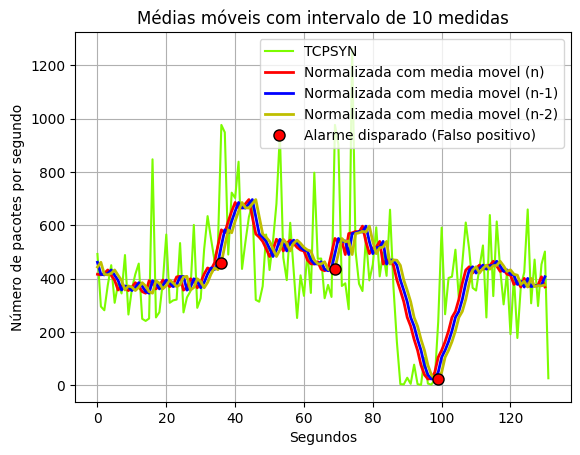

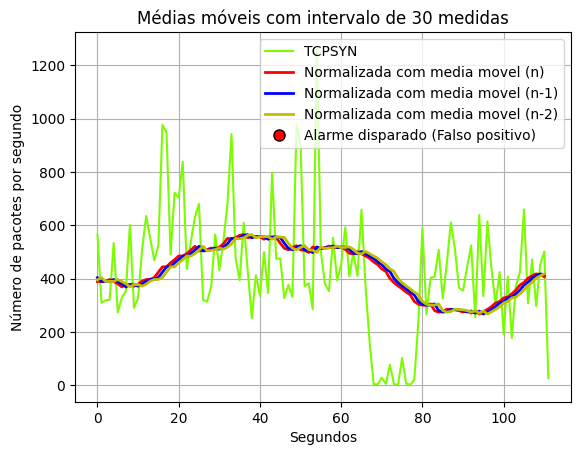

In [ ]:
# Carregamento dos dados
dados_normal_100ms=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_100ms.csv")
dados_normal_500ms=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_500ms.csv")
dados_normal_1s=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_1s.csv")

v_dados_normal_1s = dados_normal_1s[160:]

# Inicializa e zera medias
media = []
media_1 = []
media_2 = []
alarme_pos = []
alarme_val = []

# Intervalos
intervalo1=10
intervalo2=30

# Medias moveis - historico de 10 medidas
media,media_1,media_2,alarme_pos,alarme_val=aplica_var_mm(v_dados_normal_1s,1.10,intervalo1,20)
plt.plot(v_dados_normal_1s[intervalo1:], color = 'lawngreen', label = "TCPSYN")
plt.plot(media[:], color = 'r',linewidth=2, label = "Normalizada com media movel (n)")
plt.plot(media_1[:], color = 'b',linewidth=2, label = "Normalizada com media movel (n-1)")
plt.plot(media_2[:], color = 'y',linewidth=2, label = "Normalizada com media movel (n-2)")
plt.plot(alarme_pos,alarme_val, 'ro', ms=8, mec='k', label = "Alarme disparado (Falso positivo)")
plt.title('Médias móveis com intervalo de 10 medidas')
plt.xlabel('Segundos')
plt.ylabel('Número de pacotes por segundo')
plt.legend()
plt.grid()
plt.show()

# Zera medias
media = []
media_1 = []
media_2 = []
alarme_pos = []
alarme_val = []

# Medias moveis - historico de 30 medidas
media,media_1,media_2,alarme_pos,alarme_val=aplica_var_mm(v_dados_normal_1s,1.10,intervalo2,20)
plt.plot(v_dados_normal_1s[intervalo2:], color = 'lawngreen', label = "TCPSYN")
plt.plot(media[:], color = 'r',linewidth=2, label = "Normalizada com media movel (n)")
plt.plot(media_1[:], color = 'b',linewidth=2, label = "Normalizada com media movel (n-1)")
plt.plot(media_2[:], color = 'y',linewidth=2, label = "Normalizada com media movel (n-2)")
plt.plot(alarme_pos,alarme_val, 'ro', ms=8, mec='k', label = "Alarme disparado (Falso positivo)")
plt.title('Médias móveis com intervalo de 30 medidas')
plt.xlabel('Segundos')
plt.ylabel('Número de pacotes por segundo')
plt.legend()
plt.grid()
plt.show()

Por fim é possível observar a aplicação da taxa mínima para considerar a variação das médias móveis.

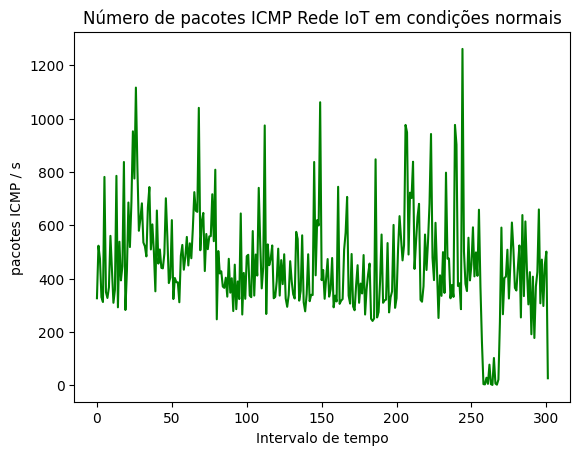

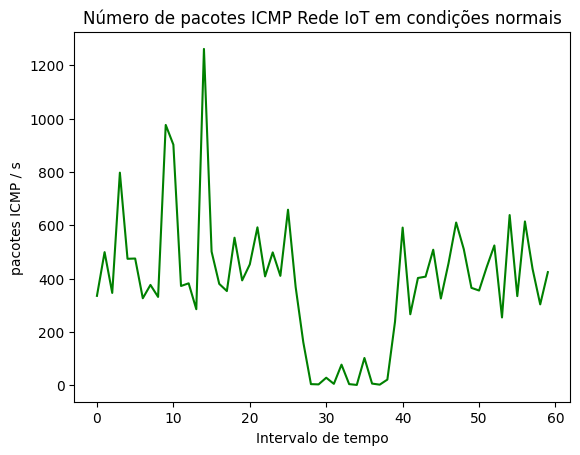

In [ ]:
# Carregamento dos dados
dados_normal_100ms=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_100ms.csv")
dados_normal_500ms=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_500ms.csv")
dados_normal_1s=prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_1s.csv")

visualiza(dados_normal_1s,'s','g','Rede IoT em condições normais',tipo_dos_pacotes)

#Zoom na área de maior interesse
v_dados_normal_1s = dados_normal_1s[230:290]

visualiza(v_dados_normal_1s,'s','g','Rede IoT em condições normais',tipo_dos_pacotes)

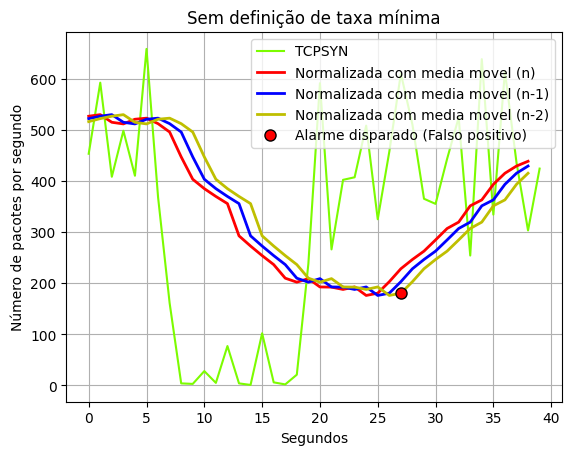

In [ ]:
# Zera medias
media = []
media_1 = []
media_2 = []
alarme_pos = []
alarme_val = []

# Medias moveis
media,media_1,media_2,alarme_pos,alarme_val=aplica_var_tm(v_dados_normal_1s,1.10,20,0)
plt.plot(v_dados_normal_1s[20:], color = 'lawngreen', label = "TCPSYN")
plt.plot(media[:], color = 'r',linewidth=2, label = "Normalizada com media movel (n)")
plt.plot(media_1[:], color = 'b',linewidth=2, label = "Normalizada com media movel (n-1)")
plt.plot(media_2[:], color = 'y',linewidth=2, label = "Normalizada com media movel (n-2)")
plt.plot(alarme_pos,alarme_val, 'ro', ms=8, mec='k', label = "Alarme disparado (Falso positivo)")
plt.title('Sem definição de taxa mínima')
plt.xlabel('Segundos')
plt.ylabel('Número de pacotes por segundo')
plt.legend()
plt.grid()
plt.show()

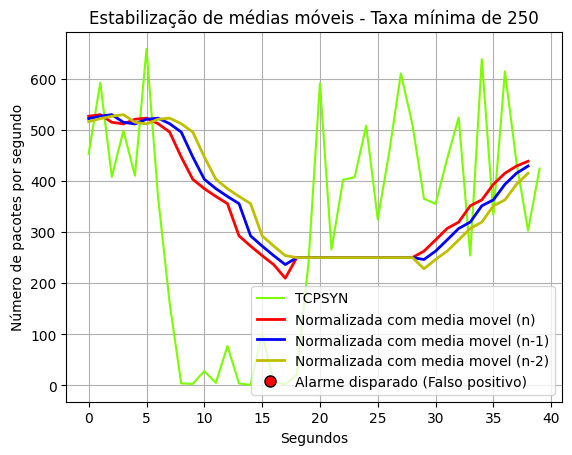

In [ ]:
# Zera medias
media = []
media_1 = []
media_2 = []
alarme_pos = []
alarme_val = []

# Medias moveis
media,media_1,media_2,alarme_pos,alarme_val=aplica_var_tm(v_dados_normal_1s,1.10,20,250)
plt.plot(v_dados_normal_1s[20:], color = 'lawngreen', label = "TCPSYN")
plt.plot(media[:], color = 'r',linewidth=2, label = "Normalizada com media movel (n)")
plt.plot(media_1[:], color = 'b',linewidth=2, label = "Normalizada com media movel (n-1)")
plt.plot(media_2[:], color = 'y',linewidth=2, label = "Normalizada com media movel (n-2)")
plt.plot(alarme_pos,alarme_val, 'ro', ms=8, mec='k', label = "Alarme disparado (Falso positivo)")
plt.title('Estabilização de médias móveis - Taxa mínima de 250')
plt.xlabel('Segundos')
plt.ylabel('Número de pacotes por segundo')
plt.legend()
plt.grid()
plt.show()

Foram realizados testes de reconhecimento de ataques do tipo TCPSYN, UDP (Fraggle), ICMP (Smurf), SSDP Reflection, SNMP Reflection, UDP (Mirai), HTTP (Mirai), MQTT-Malaria. Nos intervalos de tempo de 1m, 10s, 1s, 500ms e 100ms. Unindo todos experimentos, chega-se a um total de 423 ataques analisados, onde 392 (92,67%) foram reconhecidos com sucesso. Ocorreram 5 casos (1,18%) de falsos positivos. Os testes podem ser visualizados nos arquivos deste mesmo repositório.

In [ ]:
def prep_csv(arquivocsv):
  array_np = np.loadtxt(arquivocsv, delimiter=',',skiprows=1)
  array_np = array_np[:, 1]
  return array_np

def visualiza(serie_dados,u_tempo,c,titulo,tipo):
  plt.plot(serie_dados, color = c )
  plt.title('Número de pacotes '+tipo+' '+titulo)
  plt.xlabel('Intervalo de tempo')
  plt.ylabel('pacotes '+tipo+' / '+u_tempo)
  plt.show()

def visualizamix(serie_dados_a,ca,serie_dados_n,cn,u_tempo,tipo):
  plt.plot(serie_dados_a, color = ca, label = 'Sob ataque')
  plt.plot(serie_dados_n, color = cn, label = 'Em condições normais')
  plt.title('Número de pacotes '+tipo+' em rede IoT')
  plt.xlabel('Intervalo de tempo')
  plt.ylabel('pacotes '+tipo+' / '+u_tempo)
  plt.legend(loc='best')
  plt.show()

#
# Funcao para apresentar variacao da media movel e alarmes
#
def aplica_var_mm(serie_dados,delta_v,inter_mm,taxa_min):
  # Organiza o array em varias linhas (matriz), cada linha conterá a serie de dados para calcular a média móvel
  matriz = np.lib.stride_tricks.sliding_window_view(serie_dados,inter_mm)

  # Contadores
  cont_ataque = 0 #ataques
  cont_f_ataque = 0 #fasos positivos
  sob_ataque = 0 # caso seja um ataque de crescimento longo, será contabilizado apenas como um ataque

  # Inicia calculo e comparacao das medias moveis
  for i in range(len(matriz)):
    if i<2:
      pass #sem base para comparacao
    else:
      antpen_media=matriz[i-2].mean()
      pen_media=matriz[i-1].mean()
      media_atual=matriz[i].mean()

      media.append(matriz[i].mean())
      media_1.append(matriz[i-1].mean())
      media_2.append(matriz[i-2].mean())
      #print('media_atual:',media_atual)
      if (antpen_media<taxa_min) and (pen_media<taxa_min) and (media_atual<taxa_min):
        pass # taxa mínima
      else:
        if (media_atual>pen_media*delta_v) and (pen_media>antpen_media*delta_v) and sob_ataque == 0:
          # Se a media atual é delta_v maior que a média anterior, e a média anterior é delta_v maior que a antepenúltima, contabiliza ataque
          cont_ataque += 1
          sob_ataque = 1
          alarme_pos.append(i-2)
          alarme_val.append(antpen_media)
          #print(media_atual,pen_media,antpen_media)
        if (antpen_media>pen_media) and (pen_media>media_atual):
          sob_ataque = 0 # Media em queda, desarma sob ataque - para contabilizar novos ataques
  # Desarma flag para avaliar o tráfego de rede normal
  sob_ataque = 0
  return media,media_1,media_2,alarme_pos,alarme_val

#
# Funcao para apresentar a aplicacao da taxa mínima e alarmes
#
def aplica_var_tm(serie_dados,delta_v,inter_mm,taxa_min):
  # Organiza o array em varias linhas (matriz), cada linha conterá a serie de dados para calcular a média móvel
  matriz = np.lib.stride_tricks.sliding_window_view(serie_dados,inter_mm)

  # Contadores
  cont_ataque = 0 #ataques
  cont_f_ataque = 0 #fasos positivos
  sob_ataque = 0 # caso seja um ataque de crescimento longo, será contabilizado apenas como um ataque

  # Inicia calculo e comparacao das medias moveis
  for i in range(len(matriz)):
    if i<2:
      pass #sem base para comparacao
    else:
      antpen_media=matriz[i-2].mean()
      pen_media=matriz[i-1].mean()
      media_atual=matriz[i].mean()

      #print('media_atual:',media_atual)
      if (antpen_media<taxa_min) and (pen_media<taxa_min) and (media_atual<taxa_min):
        pass # taxa mínima
        media.append(taxa_min)
        media_1.append(taxa_min)
        media_2.append(taxa_min)
      else:
        media.append(matriz[i].mean())
        media_1.append(matriz[i-1].mean())
        media_2.append(matriz[i-2].mean())
        if (media_atual>pen_media*delta_v) and (pen_media>antpen_media*delta_v) and sob_ataque == 0:
          # Se a media atual é delta_v maior que a média anterior, e a média anterior é delta_v maior que a antepenúltima, contabiliza ataque
          cont_ataque += 1
          sob_ataque = 1
          alarme_pos.append(i-2)
          alarme_val.append(antpen_media)
          #print(media_atual,pen_media,antpen_media)
        if (antpen_media>pen_media) and (pen_media>media_atual):
          sob_ataque = 0 # Media em queda, desarma sob ataque - para contabilizar novos ataques
  # Desarma flag para avaliar o tráfego de rede normal
  sob_ataque = 0
  return media,media_1,media_2,alarme_pos,alarme_val




In [ ]:
#
# Funcao para testar o modelo
#
# serie_normal = array de pacotes em qualquer intervalo de tempo do tráfego de rede normal
# serie_ataque = array de pacotes em qualquer intervalo de tempo do tráfego de rede com ataques
# delta_v = variação da media móvel para reconhecer como anomalia ou ataque - quanto menor mais sensível
# inter_mm = intervalo de dados para obter a media móvel - quanto menor mais sensível
# taxa_min = taxa mínima (de pacotes em relacao ao tempo) para considerar a variação, abaixo disso não será avaliado - quanto menor mais sensível
#
def aplica_modelo(serie_normal,serie_ataque,delta_v,inter_mm,taxa_min):
  # Organiza o array em varias linhas (matriz), cada linha conterá a serie de dados para calcular a média móvel
  matriz_normal = np.lib.stride_tricks.sliding_window_view(serie_normal,inter_mm)
  matriz_ataque = np.lib.stride_tricks.sliding_window_view(serie_ataque,inter_mm)

  # Contadores
  cont_ataque = 0 #ataques
  cont_f_ataque = 0 #fasos positivos
  sob_ataque = 0 # caso seja um ataque de crescimento longo, será contabilizado apenas como um ataque

  # Inicia calculo e comparacao das medias moveis
  for i in range(len(matriz_ataque)):
    if i<2:
      pass #sem base para comparacao
    else:
      antpen_media=matriz_ataque[i-2].mean()
      pen_media=matriz_ataque[i-1].mean()
      media_atual=matriz_ataque[i].mean()

      #print('media_atual:',media_atual)
      if (antpen_media<taxa_min) and (pen_media<taxa_min) and (media_atual<taxa_min):
        pass # taxa mínima
      else:
        if (media_atual>pen_media*delta_v) and (pen_media>antpen_media*delta_v) and sob_ataque == 0:
          # Se a media atual é delta_v maior que a média anterior, e a média anterior é delta_v maior que a antepenúltima, contabiliza ataque
          cont_ataque += 1
          sob_ataque = 1

        if (antpen_media>pen_media) and (pen_media>media_atual):
          sob_ataque = 0 # Media em queda, desarma sob ataque - para contabilizar novos ataques
  # Desarma flag para avaliar o tráfego de rede normal
  sob_ataque = 0
  for i in range(len(matriz_normal)):
    if i<2:
      pass #sem base para comparacao
    else:
      antpen_media=matriz_normal[i-2].mean()
      pen_media=matriz_normal[i-1].mean()
      media_atual=matriz_normal[i].mean()


      if (antpen_media<taxa_min) and (pen_media<taxa_min) and (media_atual<taxa_min):
        pass # taxa mínima
      else:
        if (media_atual>pen_media*delta_v) and (pen_media>antpen_media*delta_v) and sob_ataque == 0:
          # Se a media atual é delta_v maior que a média anterior, e a média anterior é delta_v maior que a antepenúltima, contabiliza ataque
          cont_f_ataque += 1
          sob_ataque = 1
        if (antpen_media>pen_media) and (pen_media>media_atual):
          sob_ataque = 0 # Media em queda, desarma sob ataque - para contabilizar novos ataques

  return cont_ataque,cont_f_ataque
